In [5]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
mean = (1.0, 2.0)
covariance = [[1.0, 0.5], [0.5, 1.0]]

In [7]:
samples = stats.multivariate_normal.rvs(mean=mean, cov=covariance, size=10000)

In [9]:
x1, x2 = samples.T

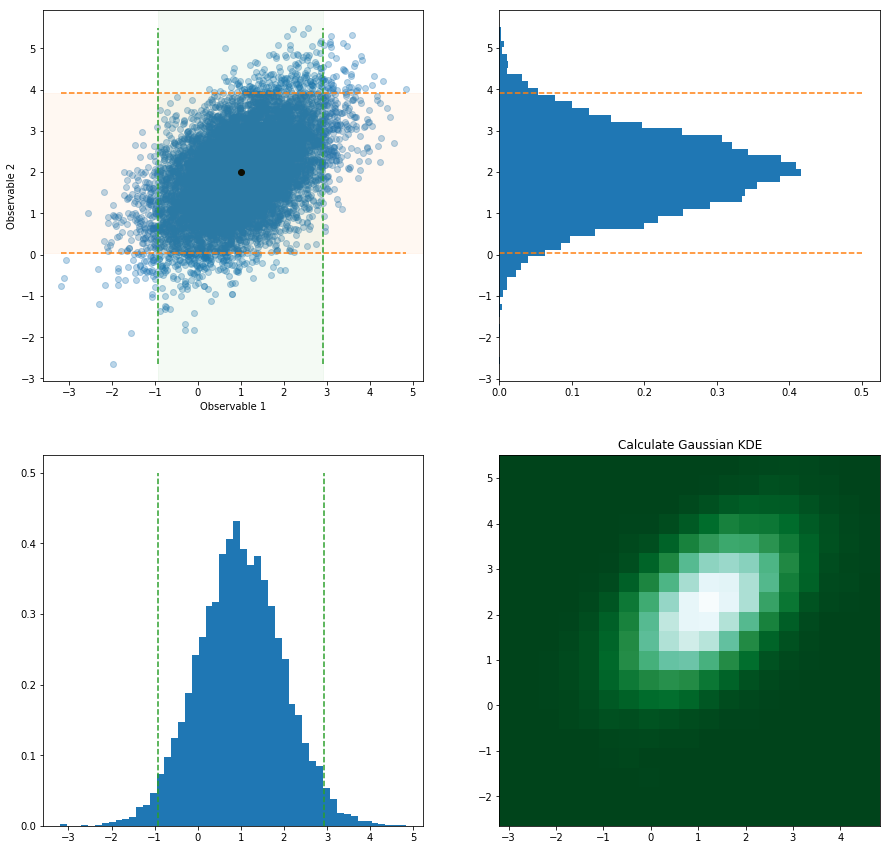

In [16]:
f,axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
axes = axes.flatten()

axes[0].scatter(x1, x2, alpha=0.3)
axes[0].scatter(mean[0], mean[1], c='k')
axes[0].set_xlabel(r'Observable 1')
axes[0].set_ylabel(r'Observable 2')

low_percentile = 2.5
high_percentile = 97.5

x1_min = x1.min()
x1_max = x1.max()
x2_min = x2.min()
x2_max = x2.max()

x1_low  = np.percentile(x1, low_percentile)
x1_high = np.percentile(x1, high_percentile)

x2_low  = np.percentile(x2, low_percentile)
x2_high = np.percentile(x2, high_percentile)

axes[0].hlines(x2_low,  x1_min, x1_max, linestyle='--', color='C1')
axes[0].hlines(x2_high, x1_min, x1_max, linestyle='--', color='C1')
axes[0].vlines(x1_low,  x2_min, x2_max, linestyle='--', color='C2')
axes[0].vlines(x1_high, x2_min, x2_max, linestyle='--', color='C2')
axes[0].axvspan(x1_low, x1_high, alpha=0.05, color='C2')
axes[0].axhspan(x2_low, x2_high, alpha=0.05, color='C1')

axes[1].hist(samples[:,1], bins=50, orientation="horizontal", normed=True);
axes[1].hlines(x2_low,  0.0, 0.5, linestyle='--', color='C1')
axes[1].hlines(x2_high, 0.0, 0.5, linestyle='--', color='C1')


axes[2].hist(samples[:,0], bins=50, normed=True)
axes[2].vlines(x1_low,  0.0, 0.5, linestyle='--', color='C2')
axes[2].vlines(x1_high, 0.0, 0.5, linestyle='--', color='C2')

f.delaxes(axes[3])

In [12]:
ngridpts = 20

In [13]:
k = stats.kde.gaussian_kde(samples.T)
x1i, x2i = np.mgrid[x1.min():x1.max():ngridpts*1j, x2.min():x2.max():ngridpts*1j]
zi = k(np.vstack([x1i.flatten(), x2i.flatten()]))

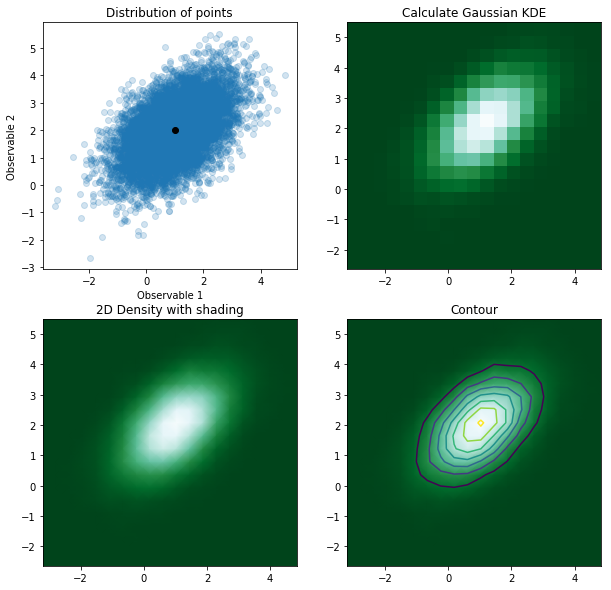

In [25]:
f,axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes = axes.flatten()
axes[0].scatter(x1, x2, alpha=0.2)
axes[0].scatter(mean[0], mean[1], c='k')
axes[0].set_xlabel(r'Observable 1')
axes[0].set_ylabel(r'Observable 2')
axes[0].set_title(r'Distribution of points')

axes[1].set_title('Calculate Gaussian KDE')
axes[1].pcolormesh(x1i, x2i, zi.reshape(x2i.shape), cmap=plt.cm.BuGn_r)

axes[2].set_title('2D Density with shading')
axes[2].pcolormesh(x1i, x2i, zi.reshape(x1i.shape), shading='gouraud', cmap=plt.cm.BuGn_r)

axes[3].set_title('Contour')
axes[3].pcolormesh(x1i, x2i, zi.reshape(x1i.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes[3].contour(x1i, x2i, zi.reshape(x1i.shape))